## Imports

In [1]:
import os
os.chdir("../")
%env CUDA_VISIBLE_DEVICES=1
%matplotlib inline

env: CUDA_VISIBLE_DEVICES=1


In [2]:
import pickle
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import tensorflow as tf
from data.dataset import Dataset
import data.data_selector as ds
import utils.data_processing as dp
import utils.plot_functions as pf
import analysis.analysis_picker as ap

In [3]:
class params(object):
  def __init__(self):
    self.model_type = "lca"
    self.model_name = "lca_1568_mnist"
    self.version = "0.0"
    self.save_info = "analysis_test_carlini_targeted"
    self.overwrite_analysis_log = False

analysis_params = params()
# Computed params
analysis_params.model_dir = (os.path.expanduser("~")+"/Work/Projects/"+analysis_params.model_name)

In [4]:
analyzer = ap.get_analyzer(analysis_params.model_type)
analyzer.setup(analysis_params)
analyzer.model.setup(analyzer.model_params)
analyzer.load_analysis(save_info=analysis_params.save_info)

KeyError: 'input_adv_cos_similarities'

In [15]:
analyzer.model_params.__dict__

{'batch_size': 100,
 'center_data': False,
 'contrast_normalize': False,
 'cp_int': 100000,
 'cp_latest_filename': 'latest_checkpoint_v0.0',
 'cp_load': False,
 'cp_load_dir': '/home/dpaiton/Work/Projects/pretrain/checkpoints/',
 'cp_load_latest_filename': 'latest_checkpoint_v0.0',
 'cp_load_name': 'pretrain',
 'cp_load_step': None,
 'cp_load_var': None,
 'cp_load_ver': '0.0',
 'cp_save_dir': '/home/dpaiton/Work/Projects/lca_1568_mnist/analysis/0.0//checkpoints/',
 'data_dir': '/home/dpaiton/Work/Datasets//MNIST/',
 'data_shape': [784],
 'data_type': 'mnist',
 'device': '/gpu:0',
 'disp_dir': '/home/dpaiton/Work/Projects/lca_1568_mnist/analysis/0.0//vis/',
 'dt': 0.001,
 'eps': 1e-12,
 'extract_patches': False,
 'gen_plot_int': 100000,
 'log_dir': '/home/dpaiton/Work/Projects/lca_1568_mnist/analysis/0.0//logfiles/',
 'log_int': 100,
 'log_to_file': True,
 'lpf_cutoff': 0.7,
 'lpf_data': False,
 'max_cp_to_keep': 1,
 'model_name': 'lca_1568_mnist',
 'model_out_dir': '/home/dpaiton/Work/

In [16]:
# load data
data = ds.get_data(analyzer.model_params)
data = analyzer.model.preprocess_dataset(data, analyzer.model_params)
data = analyzer.model.reshape_dataset(data, analyzer.model_params)
data_min = data["test"].images.min()
data_max = data["test"].images.max()
print('DATA MIN', data_min, 'DATA MAX', data_max)

Preprocessing: Normalized train data with maximum
Preprocessing: Normalized test data with maximum
DATA MIN 0.0 DATA MAX 0.99999905


Text(0.5, 1.0, 'target')

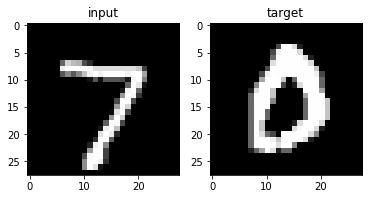

In [17]:
input_id = 1
target_id = 5
input_image = analyzer.recon_adversarial_input_images[0,...]#vh_data[input_id,...][None,...].astype(np.float32)
target_image = analyzer.adversarial_target_images[0,...]#vh_data[target_id,...][None,...].astype(np.float32)
fig, axes = plt.subplots(1,2)
axes[0].imshow(np.squeeze(input_image).reshape(int(np.sqrt(analyzer.model_params.num_pixels)), int(np.sqrt(analyzer.model_params.num_pixels))), cmap="Greys_r")
axes[0].set_title("input")
axes[1].imshow(np.squeeze(target_image).reshape(int(np.sqrt(analyzer.model_params.num_pixels)), int(np.sqrt(analyzer.model_params.num_pixels))), cmap="Greys_r")
axes[1].set_title("target")
# plt.show()
# fig.savefig(analyzer.analysis_out_dir+"/vis/adversarial_input_target.png")

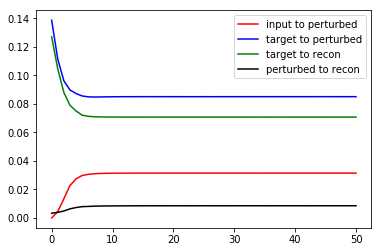

In [22]:
#These mses are in shape [num_recon_mults, num_iterations, num_batch]
plt.figure()

plt.plot(np.arange(len(analyzer.steps_idx)),
  np.array(analyzer.adversarial_input_adv_mses)[-1, :, 0], label='input to perturbed', color='r')

plt.plot(np.arange(len(analyzer.steps_idx)),
  np.array(analyzer.adversarial_target_adv_mses)[-1, :, 0], label='target to perturbed', color='b')

plt.plot(np.arange(len(analyzer.steps_idx)),
  np.array(analyzer.adversarial_target_recon_mses)[-1, :, 0], label='target to recon', color='g')

plt.plot(np.arange(len(analyzer.steps_idx)),
  np.array(analyzer.adversarial_adv_recon_mses)[-1, :, 0], label='perturbed to recon', color='k')

plt.legend()
plt.show()